In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
gamma_df = pd.read_csv("GammaDixExposure.csv")

In [6]:
gamma_df.drop(columns=["dix", "date"], inplace=True)

In [9]:
spx_change = gamma_df["price"].pct_change()

In [11]:
gamma_df["SPX Change"] = spx_change

In [14]:
gamma_df.drop(columns=["price"], inplace=True)

In [16]:
previous_gex = gamma_df["gex"].shift()

In [17]:
gamma_df["Open Gex"] = previous_gex

In [20]:
gamma_df.drop(columns=["gex"], inplace=True)

In [22]:
gamma_df.dropna(inplace=True)

In [25]:
spx_move = gamma_df["SPX Change"].abs()

In [26]:
gamma_df["SPX Move"] = spx_move

In [29]:
gamma_df.drop(columns=["SPX Change"], inplace=True)

In [44]:
gamma_df

,Open Gex,SPX Move
1,1.897313e+09,0.003379
2,1.859731e+09,0.006855
3,1.717764e+09,0.009070
4,1.361864e+09,0.003820
5,1.490329e+09,0.004544
...,...,...
2899,-6.368992e+08,0.013619
2900,5.863258e+08,0.009614
2901,1.164755e+09,0.005598
2902,1.395167e+09,0.020778


In [45]:
gamma_array = gamma_df.to_numpy()

In [47]:
y = gamma_df.iloc[:,1].values

In [50]:
X = gamma_df.iloc[:, 0:1].values

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=0)

In [53]:
from sklearn.linear_model import LinearRegression

In [54]:
LinReg = LinearRegression()

In [55]:
LinReg.fit(X_train, y_train)

LinearRegression()

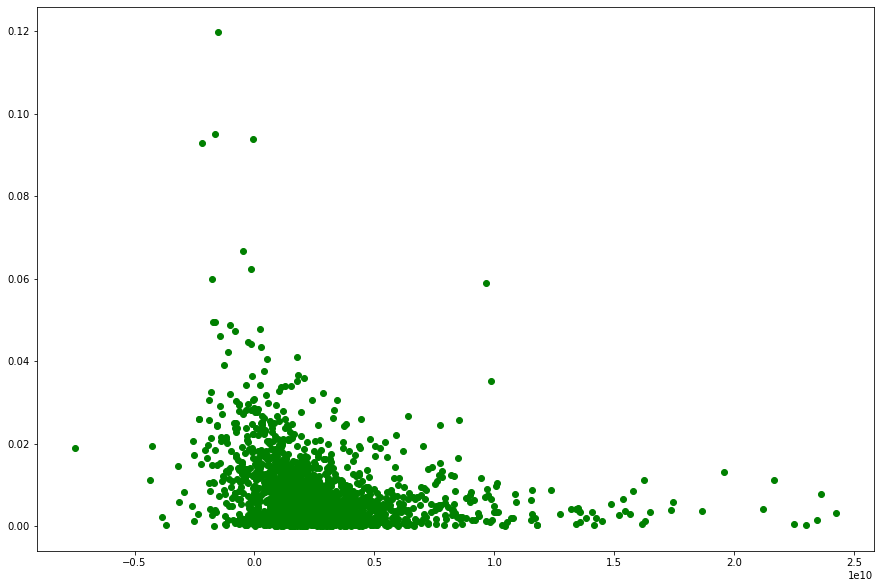

In [98]:
plt.scatter(X_train, y_train, color = "green")

In [57]:
from sklearn.preprocessing import PolynomialFeatures

In [87]:
polynom = PolynomialFeatures(degree=2)

In [88]:
X_polynom = polynom.fit_transform(X_train)

In [89]:
X_polynom

array([[ 1.00000000e+00, -1.71172029e+08,  2.92998635e+16],
       [ 1.00000000e+00,  9.01839165e+08,  8.13313880e+17],
       [ 1.00000000e+00,  3.37638666e+09,  1.13999869e+19],
       ...,
       [ 1.00000000e+00,  4.45259602e+09,  1.98256113e+19],
       [ 1.00000000e+00,  1.08505154e+10,  1.17733685e+20],
       [ 1.00000000e+00,  1.42270182e+09,  2.02408047e+18]])

In [90]:
PolyReg = LinearRegression()

In [91]:
PolyReg.fit(X_polynom, y_train)

LinearRegression()

In [92]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 15,10

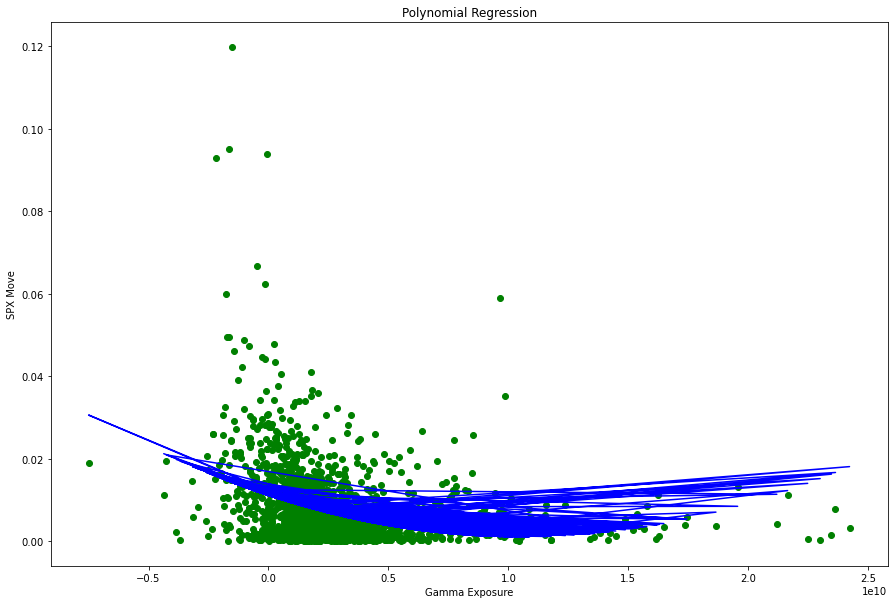

In [93]:
plt.scatter(X_train, y_train, color = "green")

plt.plot(X_train, PolyReg.predict(polynom.fit_transform(X_train)), color = "blue")

plt.title("Polynomial Regression")
plt.xlabel("Gamma Exposure")
plt.ylabel("SPX Move")

plt.show()

In [94]:
y_predict_pr = PolyReg.predict(polynom.fit_transform(X_test))

In [95]:
from sklearn import metrics

In [96]:
r_square = metrics.r2_score(y_test, y_predict_pr)

In [97]:
print(r_square)

0.11707892364599204
